In [54]:
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import re

In [55]:
arquivo = '/content/pima-data (1).csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
dados.isna().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [58]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='pedi'>

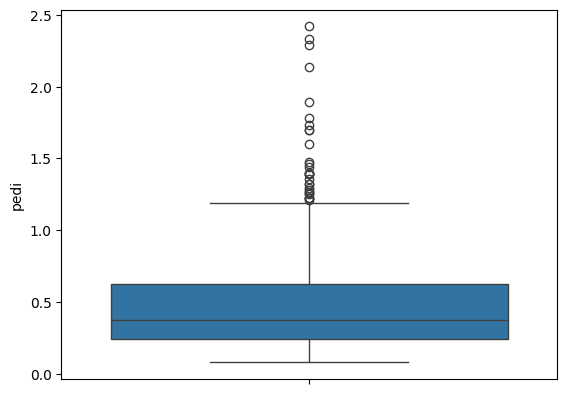

In [60]:
sns.boxplot(dados.pedi)

<Axes: xlabel='test', ylabel='Count'>

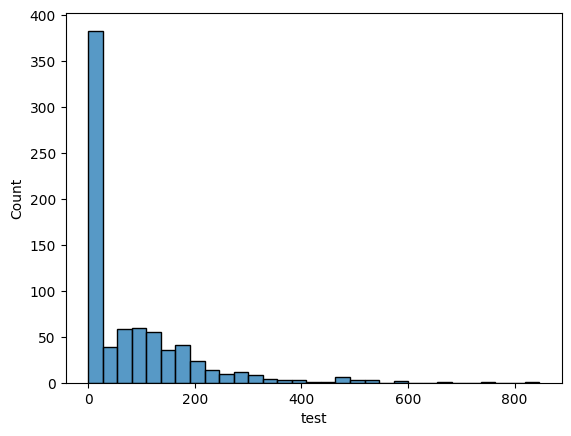

In [61]:
dados.describe()
sns.histplot(dados.test)

In [62]:
dados.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [63]:
X = array[:,0:8]
Y = array[:,8]

In [64]:
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


In [65]:
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [66]:
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [67]:
standardX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [68]:
num_folds = 10
seed = 7


In [69]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [70]:
modelo = LogisticRegression()

In [71]:
resultado = cross_val_score(modelo,standardX, Y, cv = kfold)

In [72]:
print("Acurácia: %.3f" % (resultado.mean() * 100))


Acurácia: 77.346


In [73]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [74]:
arquivo = '/content/pima-data (1).csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

In [75]:
X = array[:,0:8]
Y = array[:,8]

In [76]:
teste_size = 0.33
seed = 7

In [77]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [78]:
modelo = XGBClassifier()

In [79]:
modelo.fit(X_treino, y_treino)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

In [81]:
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 72.83%


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

In [83]:
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [84]:
X = array[:,0:8]
Y = array[:,8]

In [85]:
modelo = LogisticRegression()


In [86]:
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [87]:
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 77.479
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10)


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [89]:
X = array[:,0:8]
Y = array[:,8]

In [90]:
seed = 7
iterations = 14

In [91]:
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [92]:
modelo = LogisticRegression()

In [93]:
rsearch = RandomizedSearchCV(estimator = modelo,
                             param_distributions = valores_grid,
                             n_iter = iterations,
                             random_state = seed)
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=14,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=7)

In [94]:
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 77.479
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10)


In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [96]:
X = array[:,0:8]
Y = array[:,8]


In [97]:
seed = 7
iterations = 14

In [98]:
valores_grid = {'max_features': [3,5,7,9,10], 'max_depth': [2,3,4,5,10,15]}


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
modelo = DecisionTreeClassifier()

In [101]:
rsearch = RandomizedSearchCV(estimator = modelo,
                             param_distributions = valores_grid,
                             n_iter = iterations,
                             random_state = seed)

In [102]:
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=14,
                   param_distributions={'max_depth': [2, 3, 4, 5, 10, 15],
                                        'max_features': [3, 5, 7, 9, 10]},
                   random_state=7)

In [103]:
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 75.138
Melhores Parâmetros do Modelo:
 DecisionTreeClassifier(max_depth=5, max_features=9)


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [105]:
X = array[:,0:8]
Y = array[:,8]

In [106]:
seed = 7
iterations = 14

In [107]:
valores_grid = {'max_features': [3,5,7,9,10], 'max_depth': [2,3,4,5,10,15]}

In [108]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [111]:
modelo = XGBClassifier()

In [112]:
rsearch = RandomizedSearchCV(estimator = modelo,
                             param_distributions = valores_grid,
                             n_iter = iterations,
                             random_state = seed)

In [113]:
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=14,
                   param_distributions={'max_depth': [2, 3, 4, 5, 10, 15],
                                        'max_features': [3, 5, 7, 9, 10]},
                   random_state=7)

In [114]:
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 75.523
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
